In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.utils.class_weight import compute_sample_weight
from scipy.optimize import curve_fit

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend

#import colormap
import matplotlib
from matplotlib import cm

plt.rcParams.update({'font.size': 11})

In [2]:
df_sc_clean = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/super_cleaned.csv", index_col=0)

latc_sc_clean = df_sc_clean["latc :"].values.T
lata_sc_clean = df_sc_clean["lata :"].values.T
tc_sc_clean = df_sc_clean["tc :"].values.T
family_sc_clean = df_sc_clean["str3 :"].values.tolist()
comp_sc_clean = df_sc_clean["composition :"].values.tolist()
ref_sc_clean = df_sc_clean.index.tolist()

In [3]:
df_super = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/super_apical.csv", index_col=0)

latc_super = df_super["latc :"].values.T
lata_super = df_super["lata :"].values.T
api_super = df_super["cu-o_a :"].values.T
plnr_super = df_super["cu-o_p :"].values.T
tc_super = df_super["tc :"].values.T
family_super = df_super["str3 :"].values
comp_super = df_super["composition :"].values.tolist()
ref_super = df_super.index.tolist()

In [4]:
df_sc_top = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/super_top.csv", index_col=0)

latc_sc_top = df_sc_top["latc :"].values.T
lata_sc_top = df_sc_top["lata :"].values.T
api_sc_top = df_sc_top["cu-o_a :"].values.T
plnr_sc_top = df_sc_top["cu-o_p :"].values.T
tc_sc_top = df_sc_top["tc :"].values.T
family_sc_top = df_sc_top["str3 :"].values
weight_sc_top = compute_sample_weight('balanced', df_sc_top["str3 :"])
comp_sc_top = df_sc_top["composition :"].values.tolist()
ref_sc_top = df_sc_top.index

In [5]:
df_icsd = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/icsd_cleaned.csv", index_col=0)

latc_icsd = df_icsd["latc :"].values
lata_icsd = df_icsd["lata :"].values
api_icsd = df_icsd["cu-o_a :"].values.T
plnr_icsd = df_icsd["cu-o_p :"].values.T
family_icsd = df_icsd["str3 :"].values
comp_icsd = df_icsd["composition :"].values.tolist()
ref_icsd = df_icsd.index.tolist()

In [6]:
df_icsd_re = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/icsd_removed.csv", index_col=0)

latc_icsd_re = df_icsd_re["latc :"].values
lata_icsd_re = df_icsd_re["lata :"].values
api_icsd_re = df_icsd_re["cu-o_a :"].values.T
plnr_icsd_re = df_icsd_re["cu-o_p :"].values.T
family_icsd_re = df_icsd_re["str3 :"].values
comp_icsd_re = df_icsd_re["composition :"].values.tolist()
ref_icsd_re = df_icsd_re.index.tolist()

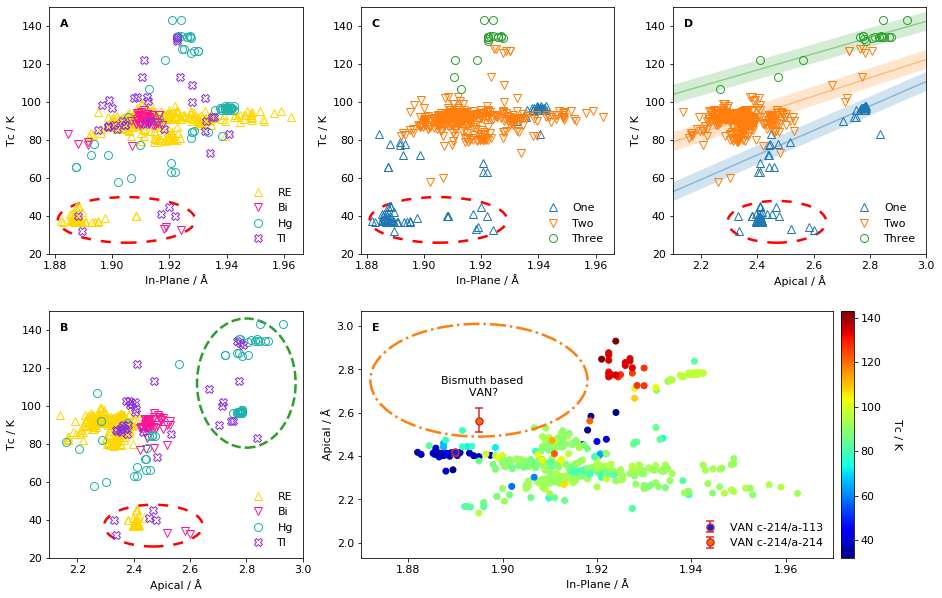

In [7]:
fig = plt.figure(figsize=(14,9), constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=3, left=0.10, right=0.97, 
                       bottom=0.10, top=0.95, wspace=0.23, hspace=0.23)
ax0 = fig.add_subplot(gs1[0, 1])
ax1 = fig.add_subplot(gs1[0, 2])
ax2 = fig.add_subplot(gs1[0, 0])
ax3 = fig.add_subplot(gs1[1, 0])
ax5 = fig.add_subplot(gs1[1, 1:])

families = ["One", "Two", "Three"]
types = ["RE","Bi", "Hg", "Tl",]
markers = ['^','v', 'o', 'X']
tab_col = ["tab:blue", "tab:orange", "tab:green"]
alt_colours = ["gold","deeppink","lightseagreen","blueviolet"]
ms = 8
alt_dash=(8, (4, 2, 0, 2))

## In-Plane by layers 

for fam, mark, col in zip(families, markers, tab_col):
    mask = np.asarray(df_sc_top["layers :"] == fam).nonzero()
    ax0.plot(plnr_sc_top[mask], tc_sc_top[mask],
                label=fam,
                marker=mark,
                markersize=ms,
                linestyle="None",
                fillstyle="none",
                color=col,
            )

ax0.set_ylabel('Tc / K')
ax0.set_ylim((20,150))
ax0.set_xlabel('In-Plane / Å')
# ax0.set_xlim((1.87,1.98))
ax0.legend(loc=4, frameon=False)

shade = matplotlib.patches.Ellipse((1.905, 38), .048, 24, 
                                   linestyle=alt_dash, linewidth=2.5,
                                   facecolor="none", edgecolor="red")
ax0.add_artist(shade)

leg = Legend(ax0, handles=[], labels=[], title=r"$\bf{C}$",
             loc='upper left', frameon=False)
ax0.add_artist(leg)

## Apical by layers 

for fam, mark, col in zip(families, markers, tab_col):
    mask = np.asarray(df_sc_top["layers :"] == fam).nonzero()
    ax1.plot(api_sc_top[mask], tc_sc_top[mask],
                label=fam,
                marker=mark,
                markersize=ms,
                linestyle="None",
#                 facecolors='none'
                fillstyle="none",
                color=col,
            )
    
    X = api_sc_top[mask]
    y = tc_sc_top[mask]
    w = weight_sc_top[mask]

    t_mask = np.where(y>50)
    
    X = X[t_mask].reshape(-1,1)
    y = y[t_mask]
    w = weight_sc_top[t_mask]
    
    xi = np.linspace(2.0, 3.0, 100).reshape(-1,1)
    
#     f = lambda x, *p: np.polyval(p, x)
#     p, cov = curve_fit(f, X.ravel(), y, [1, 1])
#     ps = np.random.multivariate_normal(p, cov, 10000)
#     ysample = np.asarray([f(xi, *pi) for pi in ps])
#     lower = np.percentile(ysample, 2.5, axis=0)
#     upper = np.percentile(ysample, 97.5, axis=0)
#     y_fit = np.poly1d(p)(xi)

    lin = LinearRegression()
    
    lin.fit(X, y, w)
    
    y_fit = lin.predict(xi)

    ax1.plot(xi, y_fit, alpha=0.4)
    shade = 5
    ax1.fill_between(xi.ravel(), y_fit+shade, y_fit-shade, alpha=0.2)

    
ax1.set_ylabel('Tc / K')
ax1.set_ylim((20,150))
ax1.set_xlabel('Apical / Å')
ax1.set_xlim((2.1,3.0))
ax1.legend(loc=4, frameon=False)  

shade = matplotlib.patches.Ellipse((2.47, 37), .35, 22, 
                                   linestyle=alt_dash, linewidth=2.5,
                                   facecolor="none", edgecolor="red")
ax1.add_artist(shade)

leg = Legend(ax1, handles=[], labels=[], title=r"$\bf{D}$",
             loc='upper left', frameon=False,)
ax1.add_artist(leg)

## In-Plane by cation

for fam, mark, col in zip(types, markers, alt_colours):
    mask = np.asarray(df_sc_top["types :"] == fam).nonzero()
    ax2.plot(plnr_sc_top[mask], tc_sc_top[mask],
                label=fam,
                marker=mark,
                markersize=ms,
                color=col,
                linestyle="None",
                fillstyle="none",
            )

ax2.set_ylabel('Tc / K')
ax2.set_ylim((20,150))
ax2.set_xlabel('In-Plane / Å')
# ax2.set_xlim((1.87,1.98))
ax2.legend(loc=4, frameon=False)

shade = matplotlib.patches.Ellipse((1.905, 38), .048, 24, 
                                   linestyle=alt_dash, linewidth=2.5,
                                   facecolor="none", edgecolor="red")
ax2.add_artist(shade)

leg = Legend(ax2, handles=[], labels=[], title=r"$\bf{A}$",
             loc='upper left', frameon=False)
ax2.add_artist(leg)


## Apical by cation


for fam, mark, col in zip(types, markers, alt_colours):
    mask = np.asarray(df_sc_top["types :"] == fam).nonzero()
    ax3.plot(api_sc_top[mask], tc_sc_top[mask],
                label=fam,
                marker=mark,
                markersize=ms,
                color=col,
                linestyle="None",
                fillstyle="none",
            )
    
ax3.set_ylabel('Tc / K')
ax3.set_ylim((20,150))
ax3.set_xlabel('Apical / Å')
ax3.set_xlim((2.1,3.0))
ax3.legend(loc=4, frameon=False)  

shade = matplotlib.patches.Ellipse((2.47, 37), .35, 22, 
                                   linestyle=alt_dash, linewidth=2.5,
                                   facecolor="none", edgecolor="red")
ax3.add_artist(shade)

shade = matplotlib.patches.Ellipse((2.8, 112), .35, 68, 
                                   linestyle='--', linewidth=2.5,
                                   facecolor="none", edgecolor="tab:green")
ax3.add_artist(shade)

leg = Legend(ax3, handles=[], labels=[], title=r"$\bf{B}$",
             loc='upper left', frameon=False)
ax3.add_artist(leg)

# Plot in-plane vs api coloured by Tc

# for fam, mark in zip(families, markers):
for fam in families:
    mask = np.asarray(df_sc_top["layers :"] == fam).nonzero()
    img = ax5.scatter(plnr_sc_top[mask], api_sc_top[mask], 
#                       s=40, 
#                       marker=mark,
                      c=tc_sc_top[mask],
                      cmap="jet",
                      vmin=np.min(tc_sc_top), vmax=np.max(tc_sc_top),
#                       facecolor='none',
#                       edgecolors='face',
#                       label=fam,
                     )

ax5.set_xlabel('In-Plane / Å')
ax5.set_xlim((1.87, 1.97))
ax5.set_ylabel('Apical / Å')
ax5.set_ylim((1.93,3.07))
cb = fig.colorbar(img, ax=[ax5], fraction=0.15, pad=0.015)
cb.set_label('Tc / K', rotation=270, labelpad=20, )

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=np.min(tc_sc_top), vmax=np.max(tc_sc_top))

#colormap possible values = viridis, jet, spectral
c_50 = cm.jet(norm(50)) 
c_120 = cm.jet(norm(120)) 

ax5.errorbar((3.78/2), (2.42), yerr=np.array((0.02, 0.01)).reshape(-1,1),
    linestyle="None",
    marker='o',
    markersize=7,
    capsize=4,   
    color=c_50,
    ecolor='tab:red',
    markeredgecolor='tab:red',
    markeredgewidth=1.5,
#     color='tab:red',
    label="VAN c-214/a-113"
    )

ax5.errorbar((3.79/2), (2.56), yerr=np.array((0.05, 0.06)).reshape(-1,1),
    linestyle="None",
    marker='o',
    markersize=7,
    capsize=4,
    color=c_120,
    ecolor='tab:red',
    markeredgecolor='tab:red',
    markeredgewidth=1.5,
#     color='tab:red',
#     fillstyle="none",
    label="VAN c-214/a-214"
    )

shade = matplotlib.patches.Ellipse((1.895,2.75), .046, .52, 
                                   linestyle='-.', linewidth=2.5,
                                   facecolor="none", edgecolor="tab:orange")
ax5.add_artist(shade)

ax5.annotate("Bismuth based\n        VAN?", (1.887,2.68))

ax5.legend(loc='lower right', frameon=False,
           facecolor='white', framealpha=1,
#            bbox_to_anchor=(1.868, 2.95), bbox_transform=ax5.transData,
          )
leg = Legend(ax5, handles=[], labels=[], title=r"$\bf{E}$",
             loc='upper left', frameon=False)
ax5.add_artist(leg)


plt.show()
fig.savefig("pyplot/download.pdf")

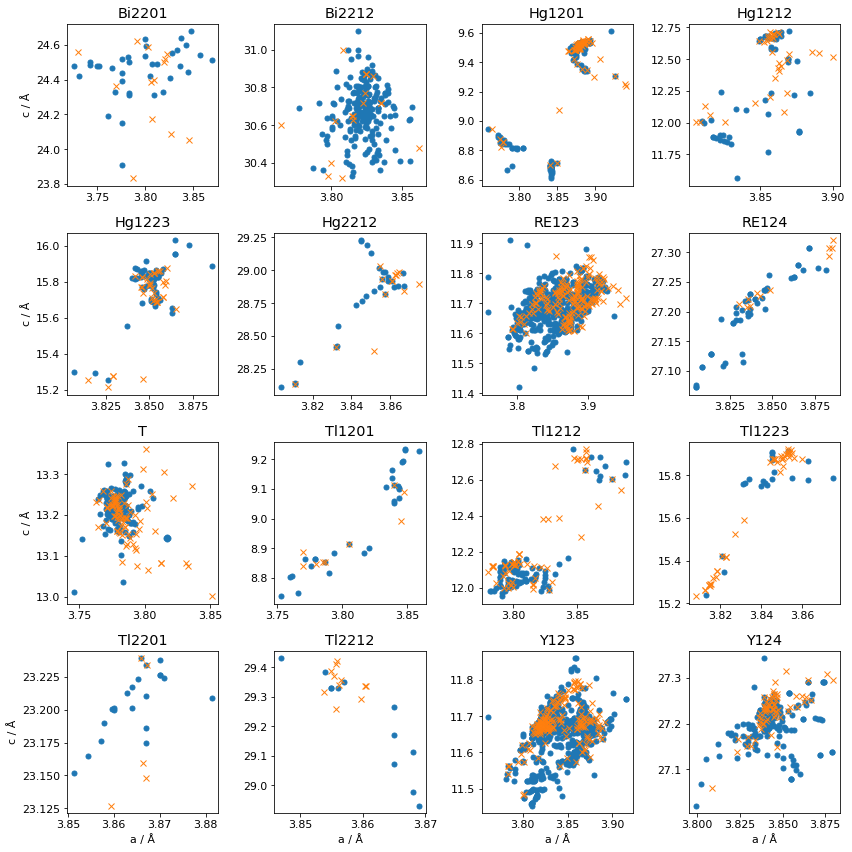

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_super = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/super_apical.csv", index_col=0)

lata_super = df_super["lata :"].values.T
latc_super = df_super["latc :"].values.T
family_super = df_super["str3 :"].values

df_icsd = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/icsd_cleaned.csv", index_col=0)

latc_icsd = df_icsd["latc :"].values
lata_icsd = df_icsd["lata :"].values
family_icsd = df_icsd["str3 :"].values

sqrt2 = np.sqrt(2)
ortho = lambda x: x/sqrt2 if x > 5 else x
compare = np.vectorize(lambda x: x/sqrt2 if x > 5 else x)
lata_super = compare(lata_super)
lata_icsd = compare(lata_icsd)

families = df_super["str3 :"].unique()
families.sort()

num = len(families)
rows = 4
cols = int((num+rows-1)/rows)

fig_2d, ax_2d = plt.subplots(cols, rows, squeeze=False, figsize=(cols*3,rows*3))
plt.rcParams.update({'font.size': 12})

for i, ftype in enumerate(families):
    j, k = divmod(i, rows)
    
    mask_super = np.where(family_super==ftype)
    a_super = lata_super[mask_super] 
    c_super = latc_super[mask_super] 
    
    mask_icsd = np.where(family_icsd==ftype)
    a_icsd = lata_icsd[mask_icsd]
    c_icsd = latc_icsd[mask_icsd]
    
    ax_2d[j,k].plot(a_super, c_super, 'o', markersize=5)
    ax_2d[j,k].plot(a_icsd, c_icsd, 'x')
    ax_2d[j,k].set_title(ftype)

ax_2d[0,0].set_ylabel("c / Å")
ax_2d[1,0].set_ylabel("c / Å")
ax_2d[2,0].set_ylabel("c / Å")
ax_2d[3,0].set_xlabel("a / Å")
ax_2d[3,0].set_ylabel("c / Å")
ax_2d[3,1].set_xlabel("a / Å")
ax_2d[3,2].set_xlabel("a / Å")
ax_2d[3,3].set_xlabel("a / Å")


fig_2d.tight_layout()
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

super_ = pd.read_csv("/home/rhys/PhD/lattice/data/processed/super_cleaned.csv")
icsd = pd.read_csv("/home/rhys/PhD/lattice/data/processed/icsd_cleaned.csv")

families = ["Tl1201", "Hg1201", "Tl1212", "Tl1223"]

fig, ax = plt.subplots(2,2, figsize=(10,10))
plt.rcParams.update({'font.size': 16})

for i, fam in enumerate(families):
    j, k = divmod(i,2)                   
    idx = (super_["str3 :"]==fam)
    X = super_.loc[idx, ["lata :", "latc :"]].values
    y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(X)
    
    ax[j,k].scatter(X[:, 0], X[:, 1], c=y_pred)
    ax[j,k].set_title(fam)
    
ax[0,0].set_ylabel("c / Å")
ax[1,0].set_ylabel("c / Å")
ax[1,0].set_xlabel("a / Å")
ax[1,1].set_xlabel("a / Å")


fig.tight_layout()
plt.savefig("k-means.pdf", bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] File /home/rhys/PhD/lattice/data/processed/super_cleaned.csv does not exist: '/home/rhys/PhD/lattice/data/processed/super_cleaned.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.svm import LinearSVR

super_ = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/super_cleaned.csv")
icsd = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/icsd_cleaned.csv")

families = icsd["str3 :"].unique()

r2_vals = []
number = []

fig, ax = plt.subplots(4,4, figsize = (16,14))

reg = LinearRegression()
huber = HuberRegressor()

for n, fam in enumerate(families):
    i, j = divmod(n, 4)
    
    idx = (icsd["str3 :"] == fam)

    api = icsd.loc[idx,["cu-o_a :"]].values.ravel()
    c = icsd.loc[idx,["latc :"]].values.ravel()
    index = icsd.loc[idx, ["col_id :"]].values.ravel()
    
    if len(api) < 5:
        print("{} not enough data".format(fam))
        continue

#     api = api/np.mean(api) - 1
#     c = c/np.mean(c) - 1
    
    reg.fit(c.reshape(-1, 1), api.reshape(-1, 1))
    slope = reg.coef_.ravel()
    intercept = reg.intercept_
    
    huber.fit(c.reshape(-1, 1), api.reshape(-1, 1))
    h_slope = huber.coef_
    h_intercept = huber.intercept_
    
    sort = c.argsort().ravel()
    
    api = api[sort]
    c = c[sort]
    index = index[sort]
    
    ends = np.array((c[0],c[-1]))
    lin = ends*slope + intercept
    h_lin = ends*h_slope + h_intercept
    
    ax[i,j].scatter(c,api, marker='x')
#     for idx, txt in enumerate(index):
#         ax[i,j].annotate(txt, (c[idx], api[idx]))
    ax[i,j].plot(ends,lin, 'r--')
    ax[i,j].plot(ends,h_lin, 'g--')
#     plt.xlabel('latc standard score')
#     plt.ylabel('apical standard score')
#     ax[i,j].legend(title="{}\nSlope: {:.2f}\nR2: {:.2f}\nh_R2: {:.2f}".format(fam, slope, r_value**2,
#                                             huber.score(c.reshape(-1, 1),api.reshape(-1, 1))))
    ax[i,j].legend(title="{}".format(fam), frameon=False, loc=2)
    

    r2_vals.append(reg.score(c.reshape(-1, 1),api.reshape(-1, 1)))
    number.append(len(c))


plt.show()
print(np.mean(r2_vals), np.median(r2_vals), 
      np.percentile(r2_vals, 75) - np.percentile(r2_vals, 25), 
      np.percentile(r2_vals, 90) - np.percentile(r2_vals, 10))

In [ ]:
dft = pd.read_csv("/home/reag2/PhD/first-year/apical/processed-data/dft_block.csv")

# reg = LinearRegression()
reg = HuberRegressor()
# reg = LinearSVR(epsilon=0.01)

idx = (icsd["str3 :"] == "T")

api = icsd[idx][["cu-o_a :"]].values
la = icsd[idx][["d_la :"]].values.ravel()
plnr = icsd[idx][["lata* :"]].values.ravel()
index = icsd[idx][["col_id :"]].values

X = np.array((la, plnr)).T

reg.fit(X, api.reshape(-1, 1))
api_p = reg.predict(X,)

print(reg.predict(((4.0,3.79),)))
# print(huber.predict(((3.79, 4.0),)))

print(reg.coef_)
print(reg.intercept_)

sort = la.argsort().ravel()
api = api[sort]
api_p = api_p[sort]
la = la[sort]
index = index[sort]

plt.figure(figsize=(10,8))
plt.scatter(la, api, marker='x')
plt.scatter(la, api_p, marker='^')
# for idx, txt in enumerate(index):
#     plt.annotate(txt, (la[idx], api[idx]))
    
lim = np.array((3.6, 3.8))    

# plt.plot(lim , lim/2 + res.mean() )
# plt.plot(lim, reg.predict(lim.reshape(-1,1)))
# plt.plot(lim, reg.predict((lim)

plt.show()


In [ ]:
res = api.ravel() - la/2

plt.hist(res)
plt.show()

print(res.min(), np.quantile(res, .05), res.mean(), np.quantile(res, .95), res.max(), res.std())

In [ ]:
def plot_and_fit(x, y, fit=True):
    """
    """
    assert x.shape[0] == y.shape[0]
    assert len(y.shape) == 1
    if len(x.shape)==1:
        x = x.reshape(-1,1)

    plt.figure(figsize=(10,8))
    plt.scatter(x, y)

    if fit:
        reg = LinearRegression()
        huber = HuberRegressor()

        reg.fit(x, y)
        slope = reg.coef_.ravel()
        intercept = reg.intercept_
        
        huber.fit(x, y)
        h_slope = huber.coef_
        h_intercept = huber.intercept_

        print("Huber {:.3f} {:.3f}".format(h_slope[0], h_intercept,))
        print("Linear {:.3f} {:.3f}".format(slope[0], intercept, ))

        ends = np.array((min(x),max(x)))
        lin = ends*slope + intercept
        h_lin = ends*h_slope + h_intercept

        h_lin = ends*h_slope + h_intercept
        plt.plot(ends,lin, 'r--')
        plt.plot(ends,h_lin, 'g--')